# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [4]:
df = pd.read_csv('/Users/hoangtran/Desktop/BCG /data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [9]:
correlation = df.corr(numeric_only=True)
print(correlation['churn'].sort_values(ascending=False))

churn                                         1.000000
margin_net_pow_ele                            0.095772
margin_gross_pow_ele                          0.095725
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.094131
channel_foosdfpfkusacimwkcsosbicdxkicaua      0.075964
                                                ...   
months_modif_prod                            -0.052120
channel_lmkebamcaaclubfxadlmueccxoimlema     -0.052946
tenure                                       -0.072409
months_activ                                 -0.074797
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   -0.080766
Name: churn, Length: 62, dtype: float64


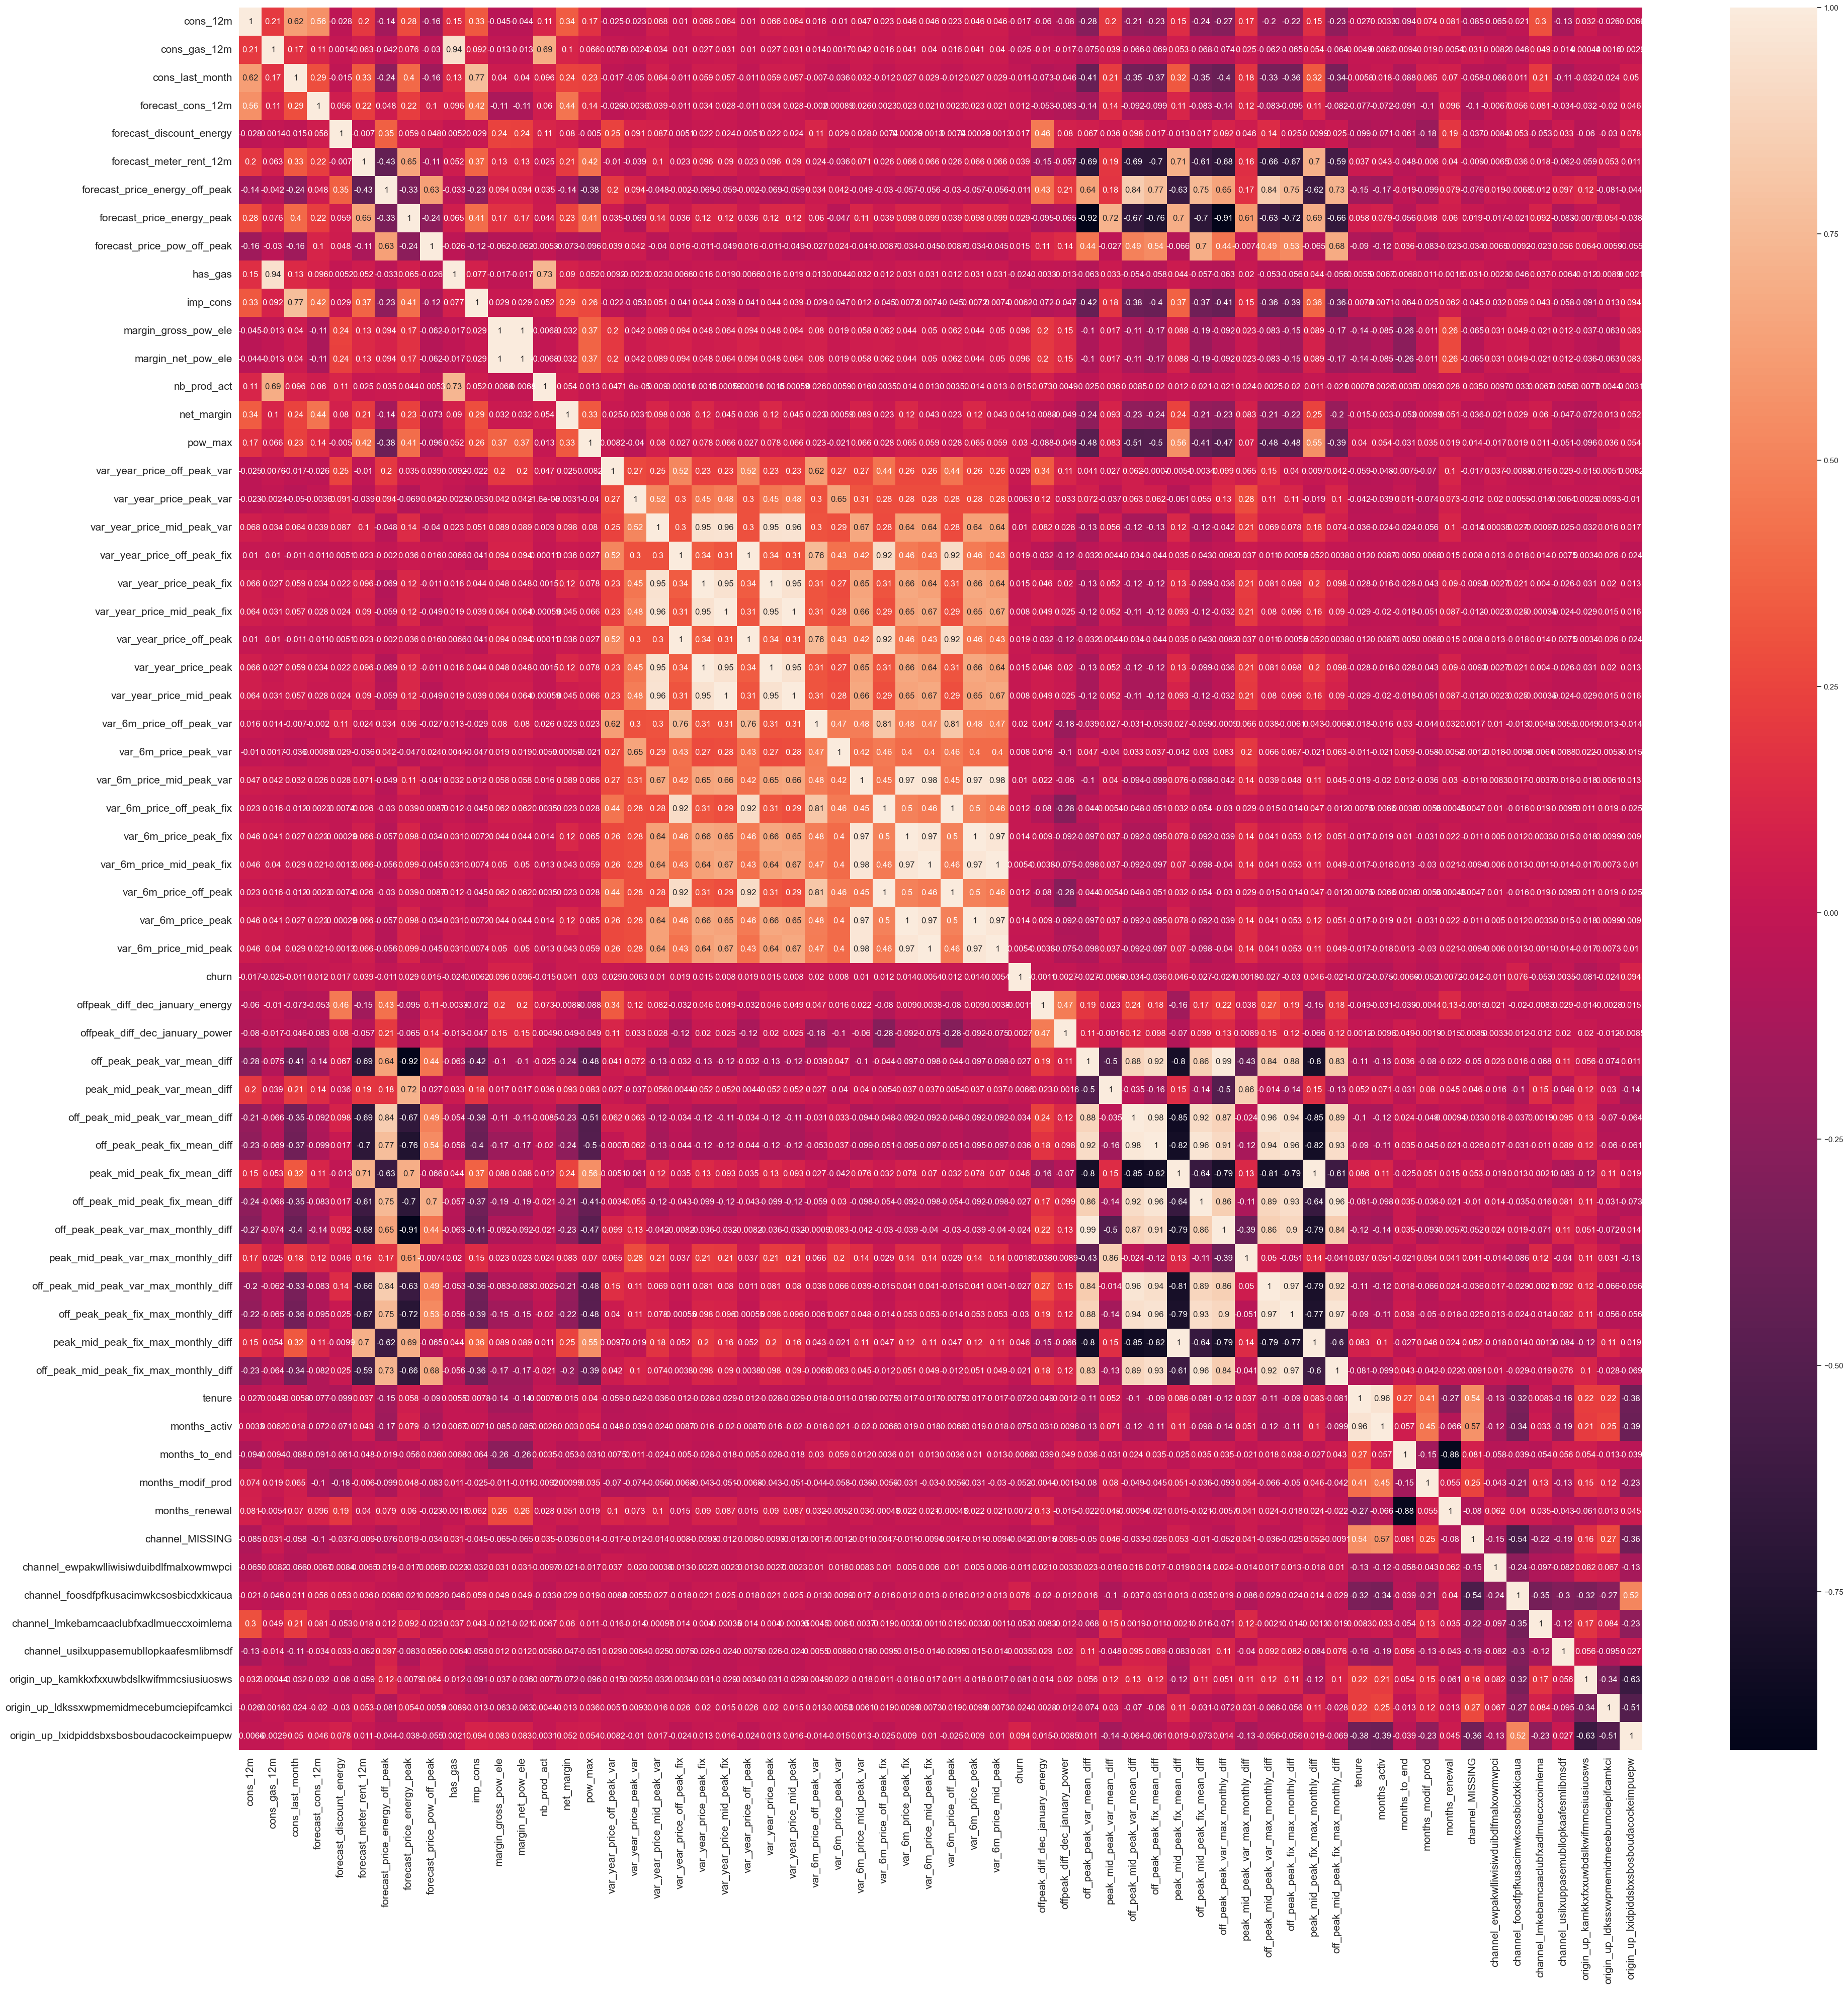

In [10]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, precision_score, recall_score, make_scorer


import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from imblearn.metrics import geometric_mean_score



### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [ ]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


1. Why did you choose the evaluation metrics that you used? Please elaborate on your choices.
2. Do you think that the model performance is satisfactory? Give justification for your answer.
3. Make sure that your work is presented clearly with comments and explanations


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [ ]:
# Add model training in here!
rfc = RandomForestClassifier() # Add parameters to the model!
model.fit() # Complete this method call!

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

### Prediction 

***Firstly,*** since the dataset has an huge imbalance between the class of chunred vs retained (10/90), which is going to make the model not sensitivy to the minority class ***the churned class*** since it has much more data of the retained-class to learn from as well as the distribution imbalance means if the model's goal is to get the most guesses correct, it would prioritize guessing retained since even with 100% guesses being retained ( churn == 0 ) the accuracy would be at around 90%, there fore accuracy will not be a sufficient indicator of the model's preformance at indentifying churn=ed customer 

**solution**: we would have to use one or many of the technique of addresing imbalance :
- model-level technique of adding weight to the miniority class to have the model be more sensitive to the minority class or 
- use a data preprocessing technique of undersamplingoversampling to have more balanced classes or oversampling with SMOTE 

***Secondly***, considering we are looking at the question is client's price sensitivity driving churn? an aspect to consider is the **feature importance** of price related data such as: pricing variation, and if changed, were the prices increased, or decreased? If the client sees a large increasre in the rate for a month and having to continue with that rate for a long time, this is a potential reason for switching to a new provider (chunrning) \
hence, we will need to use the feature_importances_ method to quantify the importance of a feature in making the churn prediction

### Performance metrics 
The model's primary focus is to predict churn, hence, the ultimate goal is for the True Positive (TP - churned customer). 
Secondary goal: 
- Since this model will distiguish between 2 classes: Retained and Churned after deployment, the secondary goal to considerince is since the dataset has an inheinrent imbalance in the class distribution, the rate of Flase Negative (FN - customer churned but being predicted as retained) will likely be higher, meaning the model will not have a high precentage of picking out the churners. Therefore, the techniques used to refine the model I want to test out will address the class imbalance in the dataset in order to lower the risk of FN and increase the F1 score (metric used to measures model's accuracy in identifying churned customers)